In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# James replication

import networkx as nx
import numpy as np
import operator as op
import itertools
from past.builtins import xrange

from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, xrange(n, n-r, -1), 1)
    denom = reduce(op.mul, xrange(1, r+1), 1)
    return numer//denom


# 0a. Friendship parameters
N = 40 # agents
d = 4 # mean neighbours

# 0b. Belief parameters
# Belief is a relationship between concepts
# Init: For each individual, throw 25 random connections at 30 concept nodes 
nconcepts = 30
beliefs = 25

# 0c. Progam variables
sims = 5
periods = 10
susceptibility = np.zeros((sims,periods,ncr(nconcepts,2))) # Collate # of people who are susceptible to specific belief
adopted = np.zeros((sims,periods,ncr(nconcepts,2))) # Collate # of people who addopt specific belief
# List of all possible beliefs
belief_universe = list(itertools.combinations(np.arange(nconcepts),2))


# 1. Diffusion/Adoption/belief update
# Nature of adoption: binary, permanent, deterministric (Watts 2002)
# Update beliefs in a random, asynchronous order (DellaPosta et al. 2015)
# Multiple beliefs diffuse simultaneously
# Beliefs are compatible with one another
# Beliefs have a symmetric influence over one another's adoption
# Depends on consistency of belief with existing semantic network
# Depends on exposure to beliefs that lie in local semantic space
# Belief is adopted if it closes a triangle in existing semantic network
for s in np.arange(sims):
	print(s)

	# build new friendship network: randomly connected
	G = nx.dense_gnm_random_graph(40,(d*N)/2) 
	# build new belief network for each person
	B = []
	for i in np.arange(N):
		B.append(nx.dense_gnm_random_graph(nconcepts,beliefs))

	for p in np.arange(periods):
		for i in np.arange(N):
			# Find ego's belief susceptibility
			poss_beliefs = []
			for idx,t in enumerate(belief_universe): # get every tuple of possible belifs
				a = t[0]
				b = t[1]
				try: 
					nx.shortest_path_length(B[i],a,b)
					if (nx.shortest_path_length(B[i],a,b)==2): # Check if it completes triangle
						poss_beliefs.append(t) # add to possible beliefs
						susceptibility[s,p,idx] = susceptibility[s,p,idx] + 1 # store that this specific (a,b) belief has one more person susceptible to it, in this period
				except:
					pass				
			# Find neighbours
			neighbors = list(G.neighbors(i))
			# Collate neighbours' beliefs
			all_neighbor_beliefs = []
			for n in neighbors:
				# Add unique beliefs 
				all_neighbor_beliefs = list(set(all_neighbor_beliefs + list(B[n].edges())))
			# Find the neighbor beliefs that intersect with poss_beliefs
			adopted_beliefs = list(set(poss_beliefs) & set(all_neighbor_beliefs))
			# Update beliefs
			B[i].add_edges_from(adopted_beliefs)
			# Store those beliefs as having one more adopter
			for ab in adopted_beliefs:
				idx = belief_universe.index(ab)
				adopted[s,p,idx] = adopted[s,p,idx] + 1
	

# A. Process data
# Assuming that percent diffusion means average proportion of people who believe average beliefnp.
adopted = adopted/N # Get proportions
adopted_by_p = np.mean(np.mean(adopted,axis=0),axis=1) # flatten across simulations and beliefs
susceptibility = susceptibility/N
sus_by_p = np.mean(np.mean(susceptibility,axis=0),axis=1)

# write files
#np.savetxt('sus.txt', sus_by_p, delimiter=',')
#np.savetxt('abyp.txt', adopted_by_p, delimiter=',')







0
1
2
3
4


In [14]:
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, xrange(n, n-r, -1), 1)
    denom = reduce(op.mul, xrange(1, r+1), 1)
    return numer//denom


# 0a. Friendship parameters
N = 40 # agents
d = 4 # mean neighbours

# 0b. Belief parameters
# Belief is a relationship between concepts
# Init: For each individual, throw 25 random connections at 30 concept nodes 
nconcepts = 30
beliefs = 25

# 0c. Progam variables
sims = 5
periods = 10
susceptibility = np.zeros((sims,periods,ncr(nconcepts,2))) # Collate # of people who are susceptible to specific belief
adopted = np.zeros((sims,periods,ncr(nconcepts,2))) # Collate # of people who addopt specific belief
# List of all possible beliefs
belief_universe = list(itertools.combinations(np.arange(nconcepts),2))


# 1. Diffusion/Adoption/belief update
# Nature of adoption: binary, permanent, deterministric (Watts 2002)
# Update beliefs in a random, asynchronous order (DellaPosta et al. 2015)
# Multiple beliefs diffuse simultaneously
# Beliefs are compatible with one another
# Beliefs have a symmetric influence over one another's adoption
# Depends on consistency of belief with existing semantic network
# Depends on exposure to beliefs that lie in local semantic space
# Belief is adopted if it closes a triangle in existing semantic network
for s in np.arange(sims):
	print(s)

	# build new friendship network: randomly connected
	G = nx.dense_gnm_random_graph(40,(d*N)/2) 
	# build new belief network for each person
	B = []
	for i in np.arange(N):
		B.append(nx.dense_gnm_random_graph(nconcepts,beliefs))

	for p in np.arange(periods):
		for i in np.arange(N): # agents
			# Find ego's belief susceptibility
			poss_beliefs = []
			for idx,t in enumerate(belief_universe): # get every tuple of possible belifs
				a = t[0]
				b = t[1]
				try: 
					#nx.shortest_path_length(B[i],a,b) #doesnt do anything?
					if (nx.shortest_path_length(B[i],a,b)==2): # Check if it completes triangle
						poss_beliefs.append(t) # add to possible beliefs
						susceptibility[s,p,idx] = susceptibility[s,p,idx] + 1 # store that this specific (a,b) belief has one more person susceptible to it, in this period
				except:
					pass				
			# Find neighbours
			neighbors = list(G.neighbors(i))
			# Collate neighbours' beliefs
			all_neighbor_beliefs = []
			for n in neighbors:
				# Add unique beliefs 
				all_neighbor_beliefs = list(set(all_neighbor_beliefs + list(B[n].edges())))
			# Find the neighbor beliefs that intersect with poss_beliefs
			adopted_beliefs = list(set(poss_beliefs) & set(all_neighbor_beliefs))
			# Update beliefs
			B[i].add_edges_from(adopted_beliefs)
			# Store those beliefs as having one more adopter
			for ab in adopted_beliefs:
				idx = belief_universe.index(ab)
				adopted[s,p,idx] = adopted[s,p,idx] + 1
	

# A. Process data
# Assuming that percent diffusion means average proportion of people who believe average beliefnp.
adopted_proportion = adopted/N # Get proportions
#adopted_by_p = np.mean(np.mean(adopted,axis=0),axis=1) # flatten across simulations and beliefs
susceptibility_proportion = susceptibility/N
#sus_by_p = np.mean(np.mean(susceptibility,axis=0),axis=1)

# write files
#np.savetxt('sus.txt', sus_by_p, delimiter=',')
#np.savetxt('abyp.txt', adopted_by_p, delimiter=',')



0
1
2
3
4


(0, 50)

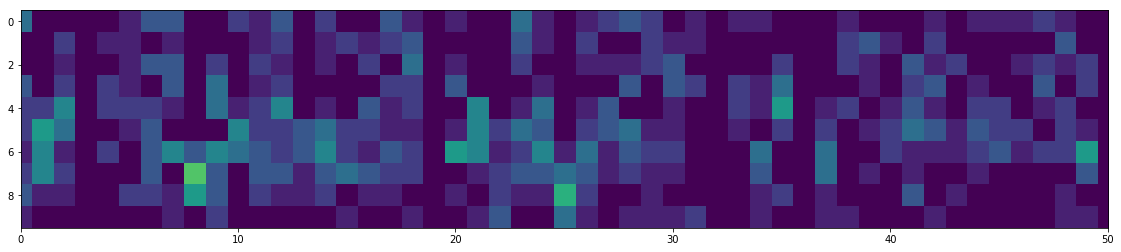

In [21]:
plt.figure(figsize=(20,4))
plt.imshow(adopted[0])
plt.xlim(0,50)

(0, 100)

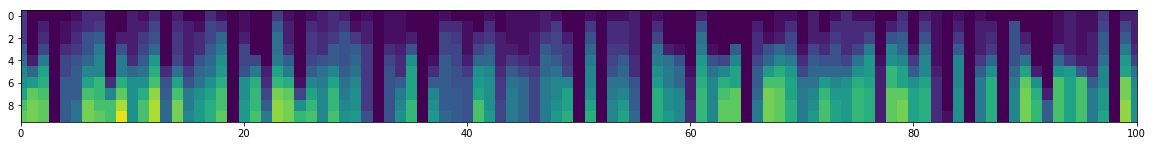

In [26]:
cumulative = adopted[0].cumsum(axis=0)
plt.figure(figsize=(20,4))
plt.imshow(cumulative)
plt.xlim(0,100)

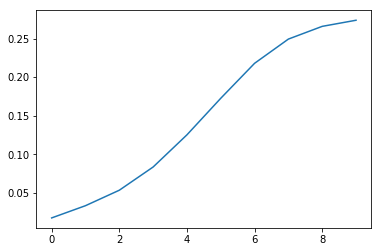

In [32]:
plt.plot(cumulative.mean(axis=1)/40)